In [1]:
import numpy as np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import spectrum

### Simulo proceso AR-4

In [17]:
M = 10000
W = np.random.randn(M)
Y = signal.lfilter([1], [1, 0.3544, 0.3508, 0.1736, 0.2401], W)

In [43]:
psd = spectrum.arma2psd([0.3544, 0.3508, 0.1736, 0.2401], NFFT=5000)

In [61]:
def make_plot(Pxx_den, Pxx_den_w, psd, n):
    plt.figure(figsize=(16,9))
    plt.plot(f, 10*np.log10(Pxx_den), label="Periodograma")
    plt.plot(f_w, 10*np.log10(Pxx_den_w), label="Welch")
    plt.plot(np.linspace(-0.5, 0.5, 5000), 10*np.log10(psd / psd.max()), label="PSD")
    plt.grid(True, which="both", alpha=0.3)
    plt.ylabel("Densidad espectral [dB]", size="xx-large")
    plt.xlabel("Frecuencia", size="xx-large")
    plt.title(f"Periodograma, estimador de Welch y PSD verdadera para AR-4 (n={n})",
              size="xx-large")
    plt.xlim(1e-7, 0.5)
    plt.ylim(-30, 20)
    plt.legend()

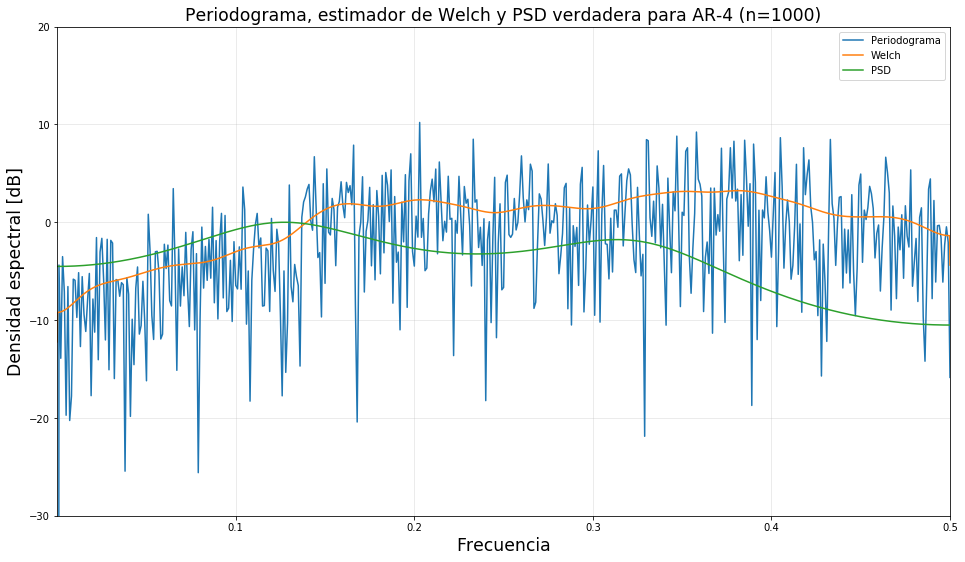

In [75]:
#Periodograma para N = 1000
(f, Pxx_den) = signal.periodogram(Y[M-1000:])
(f_w, Pxx_den_w) = signal.welch(Y[M-1000:], nperseg=50, noverlap=25, nfft=5000)
Pxx_den /= 2
Pxx_den_w /= 2
make_plot(Pxx_den, Pxx_den_w, psd, 1000)


<Figure size 1152x648 with 0 Axes>

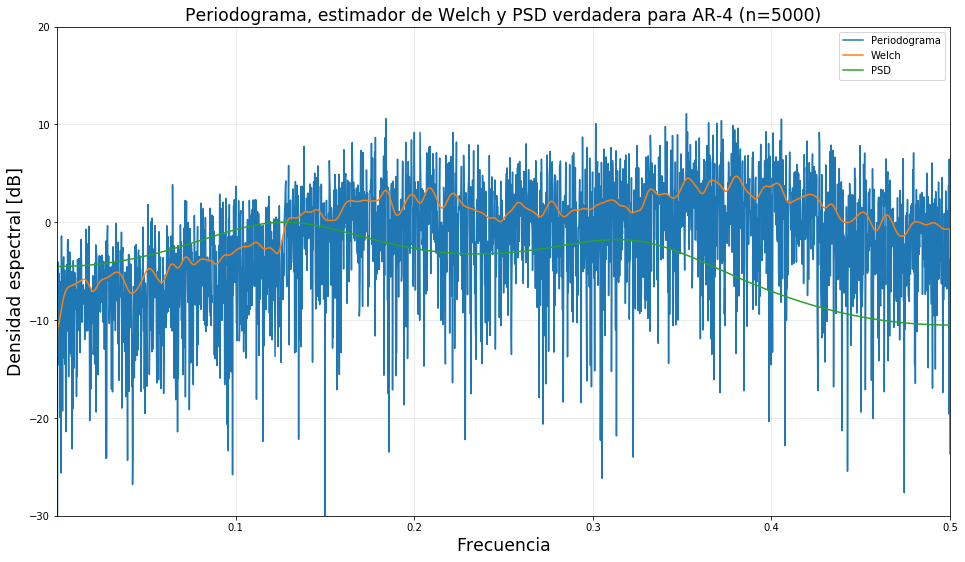

In [77]:
#Periodograma para N = 5000
(f, Pxx_den) = signal.periodogram(Y[M-5000:])
(f_w, Pxx_den_w) = signal.welch(Y[M-5000:], nperseg=250, noverlap=125, nfft=5000)

Pxx_den /= 2
Pxx_den_w /= 2
plt.figure(figsize=(16,9))

make_plot(Pxx_den, Pxx_den_w, psd, 5000)
#plt.semilogy(f, Pxx_den, label="Periodograma")
#plt.semilogy(f_w, Pxx_den_w, label="Welch")
#plt.semilogy(np.linspace(-0.5, 0.5, 5000), psd, label="PSD")
#plt.grid(True, which="both", alpha=0.3)
#plt.ylabel("Densidad espectral [dB]", size="xx-large")
#plt.xlabel("Frecuencia", size="xx-large")
#plt.title("Periodograma, estimador de Welch y PSD verdadera para AR-4 (n=5000)", size="xx-large")
#plt.xlim(1e-7, 0.5)
#plt.ylim(1e-5, 1e2)
#plt.legend()